Код полностью воиспроизводим, нужно подставить свой токен.

Почему этот пайплайн подходит для SberQuAD?
SberQuAD — русскоязычный RDQA-like датасет, похожий по структуре на англоязычный SQuAD, значит подход с моделями и методами извлечения ответа подходит очень хорошо.

Метрики Exact Match и F1 — стандартные и широко применяемые во всех QA задачах.

Структура — воспроизводимая и позволяет понять работу модели и качество на реальных данных.

1. Загрузка предобученной модели и токенизатора
Используем модели
cointegrated/rut5-base-multitask

sberbank-ai/rugpt3small_based_on_gpt2"

ai-forever/ruBert-large

Токенизатор разбивает текст на понятные модели слова/токены.


2. Подготовка данных
Для QA модель принимает сразу пару: вопрос + контекст.

Контекст — фрагмент текста, где нужно найти ответ, вопрос — то, на что нужно ответить.

Например, берем первый элемент тестового датасета для примера.

3. Токенизация и предсказание
Токенизатор преобразует текст в числовые тензоры для модели.

Переменная inputs содержит уже числовой формат с вопросом и контекстом.

Модель выдаёт два вектора логитов — для начала и конца ответа.

Берём позиции с максимальными значениями и преобразуем обратно в текст.

4. Метрики качества
Exact Match (EM) — насколько ответ модели совпадает с эталоном полностью.

F1-score — гармоническое среднее точности и полноты (если часть слов совпала).

Используя библиотеку evaluate можно считать эти метрики легко и корректно.

5. Оценка всей выборки
Запускаем цикл по тестовым примерам.

Собираем все ответы и правильные ответы.

Считаем средние метрики EM и F1, чтобы понять качество модели в целом.

6. Визуализация
Можно посмотреть распределение длин ответов, ошибки и т.п.

Для анализа удобно использовать matplotlib или seaborn.

- Примечание:
Что такое метрики?

 "Трек A: **Question Answering (QA)** — оценка точности ответов на вопросы".

У нас есть список вопросов и правильные ответы на них. Наша задача — проверить, насколько хорошо разные "умные программы" (языковые модели) отвечают на эти вопросы.

1.  **Мы готовим "контрольную работу":**
    *   Собираете 50-100 вопросов (например: "Какая столица Франции?", "Кто написал 'Войну и мир'?").
    *   Для каждого вопроса вы записываете *правильный* ответ. Это как ответы в конце учебника.

2.  **Мы даём "контрольную" разным "ученикам" (языковым моделям):**
    *   Берёте, например, "Ученика А" и просите его ответить на все ваши вопросы.
    *   Берёте "Ученика Б" и просите его сделать то же самое.

3.  **Мы проверяем ответы "учеников" с помощью специальных "линеек":**
    *   **Линейка "Точное совпадение" (Exact Match):** Смотрите, совпадает ли ответ ученика с правильным ответом *слово в слово*. Если да, ставите 1 балл, если нет — 0.
    *   **Линейка "Насколько близко по смыслу" (F1-score):** Смотрите, сколько важных слов из правильного ответа есть в ответе ученика, и сколько лишних слов он не добавил. Эта линейка более гибкая.
    *   **Линейка "Похожесть по смыслу" (Semantic Similarity):** Эта линейка проверяет, не просто слова, а *общий смысл* ответа. Даже если слова разные, но смысл тот же, она это заметит.
    *   **Линейка "Насколько похожи части предложений" (BLEU):** Это как если бы мы смотрели, сколько маленьких кусочков (фраз) из правильного ответа есть в ответе ученика.

4.  **Мы смотрим на оценки и делаем выводы:**
    *   После того как мы измерили ответы всех учеников всеми линейками, у нас будут цифры.
    *   Мы посмотрим: "Ученик А" набрал 80% по "Точному совпадению", а "Ученик Б" — 60%. Значит, "Ученик А" точнее.
    *   Но по "Похожести по смыслу" они оба набрали 95%. Это значит, что хоть "Ученик Б" и не всегда точен в словах, его ответы всё равно имеют правильный смысл.
    *   На основе этих цифр мы решаем, какой "ученик" (языковая модель) лучше подходит для ваших задач. Например, если нам нужна абсолютная точность, мы выбераем того, кто лучше по "Точному совпадению". Если важнее общий смысл, а не дословность, мы посмотрите на "Похожесть по смыслу".

В общем, это способ объективно измерить, насколько хорошо языковые модели умеют отвечать на вопросы, и понять, в чём они сильны, а в чём не очень.

Question Answering (QA)

1: Берём датасет с вопросами и правильными ответами (50-100 штук на русском)

2: Даём вопросы модели, она генерирует ответы

3: Сравниваем ответы модели с правильными ответами

4: Считаем метрики:

F1-score — частичные совпадения
Exact Match — точные совпадения
BLEU — качество текста
Semantic Similarity — похожесть по смыслу
5: Анализируем результаты — какая модель лучше отвечает

Выбираем готовый публичный датасет:

SberQuAD

Источник: Hugging Face
Размер: 50K+ примеров.
Почему SberQuAD?

- Соответствие задаче: SberQuAD является русской версией SQuAD (Stanford Question Answering Dataset), который специально разработан для задач QA и оценки точности фактической информации. Это идеально соответствует фокусу Трек.

- Готовый формат (контекст + вопрос + ответ): Наличие контекста, вопроса и эталонного ответа упрощает использование датасета для оценки. Модели будут отвечать на вопросы на основе предоставленного контекста, что является стандартным подходом в QA.

- Большой размер: 50K+ примеров — это достаточно большой объем данных, чтобы провести значимое сравнение моделей.

- Актуальность: Это публичный и широко известный датасет, который уже используется для бенчмаркинга русскоязычных QA-систем, что делает результаты более сопоставимыми с другими исследованиями.

! Этот набор моделей для эксперимента очень хорошо сбалансирован и позволит вам провести глубокий анализ.
Описание архитектур декодеров указанных моделей:

1. cointegrated/rut5-base-multitask (T5)
Это модель на базе архитектуры T5 (Text-to-Text Transfer Transformer), которая является семейством энкодер-декодерных трансформеров.

Декодер у T5 — это авторегрессивный трансформер, который генерирует выходной текст шаг за шагом, используя маскирование для предотвращения "заглядывания вперёд".

Он получает на вход скрытые представления из энкодера и генерирует последовательность токенов.

Благодаря отдельному декодеру T5 можно эффективно выполнять задачи генерации текста, трансформации и перевода.

Декодер оснащён слоями внимания (self-attention и cross-attention) и полностью обучается совместно с энкодером для оптимального контекстного понимания и генерации.

2. sberbank-ai/rugpt3small_based_on_gpt2 (GPT2)
Основан на архитектуре GPT-2, которая состоит из одного трансформерного декодера без энкодера (decoder-only).

Декодер GPT-2 — это авторегрессивный трансформер с маскированием, который генерирует текст по одному токену, учитывая предыдущие токены в последовательности.

В модели используются слои self-attention с маскированием для предотвращения утечки будущей информации.

Архитектура ориентирована на генерацию последовательностей и удобна для задач автодополнения, генерации текста, диалогов.

В версии Sberbank AI добавлена адаптация под русский язык и оптимизация под малый размер (small).

3. Den4ikAI/rubert_large_squad_2
Модель RuBERT Large основана на архитектуре BERT, которая является энкодером, и не содержит декодера в классическом смысле.

Для решения задачи вопросно-ответа (QA) к BERT добавляются специализированные выходные слои (heads), которые предсказывают позиции начала и конца ответа в контексте.

Модель не генерирует последовательность токенов, а выделяет существующий фрагмент текста (извлечение ответа).

Поэтому термин "декодер" здесь менее применим — это скорее энкодер с классификационными слоями.

Обеспечивает глубокое представление контекста и точное выделение ответов на вопросы.





# Проверяем модели по тексту

In [66]:
!pip install transformers torch datasets evaluate sentence-transformers nltk openai tqdm


In [70]:
import os
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Указываем токен для доступа к Hugging Face
HF_API_TOKEN = "Добавте свой токен"

# Загрузка модели и токенизатора с использованием токена
model_name = "cointegrated/rut5-base-multitask"
tokenizer = T5Tokenizer.from_pretrained(model_name, token=HF_API_TOKEN, legacy=False)
model = T5ForConditionalGeneration.from_pretrained(model_name, token=HF_API_TOKEN)

# Пример вопроса и контекста
context = "Лев Николаевич Толстой написал роман 'Война и мир' в 1869 году."
question = "Кто написал роман 'Война и мир'?"

# Формирование входных данных
input_text = f"question: {question} context: {context}"
input_ids = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True).input_ids

# Генерация ответа
outputs = model.generate(input_ids, max_length=50)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Ответ: {answer}")


Ответ: Лев Николаевич Толстой


In [69]:
import os
from transformers import GPT2LMHeadModel, GPT2Tokenizer

HF_API_TOKEN = getpass("Введите ваш Hugging Face токен: ")
os.environ["HF_TOKEN"] = HF_API_TOKEN

# Загрузка модели и токенизатора
model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name, token=HF_API_TOKEN)
model = GPT2LMHeadModel.from_pretrained(model_name, token=HF_API_TOKEN)

# Пример вопроса и контекста
context = "Лев Николаевич Толстой написал роман 'Война и мир' в 1869 году."
question = "Кто написал роман 'Война и мир'?"

# Формирование входных данных
input_text = f"Контекст: {context}\nВопрос: {question}\nОтвет:"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Генерация ответа
outputs = model.generate(
    input_ids,
    max_length=len(input_ids[0]) + 50,  # Увеличиваем длину для генерации ответа
    num_beams=5,
    early_stopping=True,
    no_repeat_ngram_size=2,
    pad_token_id=tokenizer.eos_token_id
)

# Декодирование ответа
answer_ids = outputs[0][len(input_ids[0]):]  # Извлекаем только сгенерированную часть
answer = tokenizer.decode(answer_ids, skip_special_tokens=True)

print(f"Ответ: {answer}")


Введите ваш Hugging Face токен: ··········


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Ответ:  В.Н.Толстой. Это роман-эпопея, написанная в 1872-1873 годах. В ней рассказывается о событиях, происходивших в России в начале XIX века. Роман был опубликован в журнале 'Огонек'.



# Смотрим на датасет

In [65]:
!pip install datasets evaluate requests numpy transformers torch rouge_score

import os
import requests
import time
from datasets import load_dataset
from evaluate import load
import evaluate
import numpy as np
from collections import defaultdict

from getpass import getpass

HF_API_TOKEN = getpass("Введите ваш Hugging Face токен: ")
os.environ["HF_TOKEN"] = HF_API_TOKEN

try:
    dataset = load_dataset("kuznetsoffandrey/sberquad", token=HF_API_TOKEN)
    print(f"Датасет SberQuAD загружен! Размер: {len(dataset['validation'])} примеров")
except Exception as e:
    print(f"Ошибка при загрузке датасета: {e}")

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=ab12bf7d0ac525df88c87fb0334fb8bcb94276be04ecea1ad4558f4b8e2f531f
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score
Введите ваш Hugging Face токен: ··········
Датасет SberQuAD загружен! Размер: 5036 примеров


In [ ]:
print("Доступные разделы:", dataset.keys())

Доступные разделы: dict_keys(['train', 'validation', 'test'])


Нам подходит раздел validation (валидационный набор).

Вот почему:
- train (обучающий набор): Этот раздел используется для обучения моделей. Если вы будете оценивать модели на данных, на которых они обучались, результаты будут завышены и не будут отражать их реальную производительность на новых, "невиданных" данных. Это называется "переобучение".
- test (тестовый набор): Тестовый набор предназначен для финальной, окончательной оценки модели после завершения всех этапов разработки и тюнинга. Его обычно держат в "строгом секрете" и используют только один раз, чтобы получить максимально объективную оценку. Если вы будете много раз "играть" с тестовым набором, вы можете случайно "подогнать" свои настройки под него, и тогда он перестанет быть объективным.
- validation (валидационный набор): Этот раздел идеально подходит для экспериментов, отладки, выбора моделей и сравнения их производительности в процессе разработки или выполнения таких заданий, как ваше. Он содержит данные, которые модели, как правило, не видели во время обучения (или видели очень ограниченно), но которые вы можете использовать многократно для оценки, не "загрязняя" при этом тестовый набор.

- Таким образом, dataset["validation"] — это самый подходящий выбор.

In [ ]:
import random
# Подготавливаем тестовые данные
# Берем 1000 случайных примеров из валидационного набора для теста.
# shuffle(seed=42) перемешивает данные, а select(range(100)) выбирает первые 100 после перемешивания.
# Использование seed=42 гарантирует, что при каждом запуске будут выбраны одни и те же случайные примеры.
num_examples = 100  # 100 вопросов
test_data  = dataset["validation"].shuffle(seed=42).select(range(num_examples))
print(f"Подготовлено {len(test_data)} случайных примеров для тестирования.")

Подготовлено 100 случайных примеров для тестирования.


In [ ]:

# Проверяем структуру данных
print("Структура датасета SberQuAD:")
print(f"- Размер тестовой выборки: {len(test_data)}")
print(f"- Поля: {test_data.column_names}")

# Показываем пример
sample = test_data[0]
print(f"\n Пример данных:")
print(f"Контекст: {sample['context'][:200]}...")
print(f"Вопрос: {sample['question']}")
print(f"Ответ: {sample['answers']['text'][0]}")
print(f"Позиция ответа: {sample['answers']['answer_start'][0]}")

# Источник и описание
print(f"\nОписание датасета:")
print(f"Источник: Hugging Face (kuznetsoffandrey/sberquad)")
print(f"Описание: Русская версия датасета SQuAD")
print(f"Формат: Контекст + Вопрос + Ответ с позицией")
print(f"Язык: Русский")
print(f"Тип задачи: Extractive Question Answering")


Структура датасета SberQuAD:
- Размер тестовой выборки: 100
- Поля: ['id', 'title', 'context', 'question', 'answers']

 Пример данных:
Контекст: Беспилотное воздушное судно — воздушное судно, которое предназначено выполнять полет без пилота на борту.[18] Беспилотная авиационная система — Воздушное судно и связанные с ним элементы, которые эксп...
Вопрос: Как называется воздушное судно, выполняющее полет без пилота на борту?
Ответ: Беспилотное
Позиция ответа: 0

Описание датасета:
Источник: Hugging Face (kuznetsoffandrey/sberquad)
Описание: Русская версия датасета SQuAD
Формат: Контекст + Вопрос + Ответ с позицией
Язык: Русский
Тип задачи: Extractive Question Answering


In [ ]:
print(f"- Поля: {test_data.column_names}")

- Поля: ['id', 'title', 'context', 'question', 'answers']


In [ ]:
sample = test_data[45]
print(f"Контекст: {sample['context'][:200]}...")  # Первые 200 символов контекста
print(f"Вопрос: {sample['question']}")
print(f"Эталонный ответ: {sample['answers']['text'][0]}")


Контекст: Если мутация затрагивает молчащие участки ДНК, либо приводит к замене одного элемента генетического кода на синонимичный, то она обычно никак не проявляется в фенотипе (проявление такой синонимичной з...
Вопрос: От чего не зависит или слабо зависит скорость накопления мутаций в данном гене?
Эталонный ответ: от действия естественного отбора


 - Структура выбранных данных
Каждый пример в test_data будет содержать:

- context: Текст, в котором содержится ответ.
- question: Вопрос.
- answers: Эталонный ответ и его позиция в контексте.

## Полный код ##

In [41]:
# Установка необходимых библиотек (выполняется один раз)
# Запускайте только при первом запуске
!pip install -q transformers torch datasets evaluate nltk matplotlib seaborn

In [42]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import (
    T5ForConditionalGeneration, T5Tokenizer,
    GPT2LMHeadModel, GPT2Tokenizer,
    AutoModelForQuestionAnswering, AutoTokenizer
)
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import nltk
import os

In [43]:
# Скачиваем ресурс 'punkt' для токенизации предложений
nltk.download('punkt', quiet=True)

True

In [ ]:
from getpass import getpass

# Безопасный ввод токена (не будет виден)
HF_API_TOKEN = getpass("Введите ваш Hugging Face токен: ")
os.environ["HF_TOKEN"] = HF_API_TOKEN

Введите ваш Hugging Face токен: ··········


In [45]:
try:
    # Загружаем датасет SberQuAD с использованием токена
    dataset = load_dataset("kuznetsoffandrey/sberquad", token=HF_API_TOKEN)
    print(f"✅ Датасет SberQuAD загружен! Размер: {len(dataset['validation'])} примеров")

    # Выбираем 50 случайных примеров для тестирования
    num_examples = 50
    test_data = dataset["validation"].shuffle(seed=42).select(range(num_examples))
    print(f"✅ Подготовлено {len(test_data)} случайных примеров для тестирования.")
except Exception as e:
    print(f"❌ Ошибка при загрузке датасета: {e}")
    test_data = None

✅ Датасет SberQuAD загружен! Размер: 5036 примеров
✅ Подготовлено 50 случайных примеров для тестирования.


In [46]:
# Кэш для ускорения повторной загрузки моделей
model_cache = {}

In [47]:
def simple_tokenize(text):
    """Простая токенизация по пробелам."""
    return text.split()

def compute_exact_match(prediction, reference):
    """Точное совпадение (Exact Match)."""
    return int(prediction.strip() == reference.strip())

def compute_f1(prediction, reference):
    """Расчёт F1 Score на уровне слов."""
    pred_tokens = set(simple_tokenize(prediction.lower()))
    ref_tokens = set(simple_tokenize(reference.lower()))
    if len(pred_tokens) == 0 or len(ref_tokens) == 0:
        return 0
    common_tokens = pred_tokens.intersection(ref_tokens)
    precision = len(common_tokens) / len(pred_tokens)
    recall = len(common_tokens) / len(ref_tokens)
    return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

def compute_bleu(prediction, reference):
    """Расчёт BLEU Score с использованием NLTK."""
    smoothing = SmoothingFunction().method1
    pred_tokens = simple_tokenize(prediction.lower())
    ref_tokens = [simple_tokenize(reference.lower())]
    return sentence_bleu(ref_tokens, pred_tokens, smoothing_function=smoothing)

In [48]:
def get_model_and_tokenizer(model_name, model_type):
    """Загружает модель и токенизатор по имени."""
    if model_name in model_cache:
        return model_cache[model_name]

    try:
        if model_type == "T5":
            tokenizer = T5Tokenizer.from_pretrained(model_name, token=HF_API_TOKEN, legacy=False)
            model = T5ForConditionalGeneration.from_pretrained(model_name, token=HF_API_TOKEN)
        elif model_type == "GPT2":
            tokenizer = GPT2Tokenizer.from_pretrained(model_name, token=HF_API_TOKEN)
            tokenizer.pad_token = tokenizer.eos_token  # GPT2 не имеет pad-токена
            model = GPT2LMHeadModel.from_pretrained(model_name, token=HF_API_TOKEN)
        elif model_type == "QA":
            tokenizer = AutoTokenizer.from_pretrained(model_name, token=HF_API_TOKEN)
            model = AutoModelForQuestionAnswering.from_pretrained(model_name, token=HF_API_TOKEN)
        else:
            print(f"❌ Неизвестный тип модели: {model_type}")
            return None, None

        # Сохраняем в кэш
        model_cache[model_name] = (model, tokenizer)
        return model, tokenizer

    except Exception as e:
        print(f"❌ Ошибка при загрузке модели {model_name}: {e}")
        return None, None

In [49]:
def test_t5_model_with_params(model_name, test_data, prompt_format="question: {question} context: {context}",
                              temperature=1.0, max_length=50):
    """Тестирует T5-модель с заданными параметрами."""
    try:
        model, tokenizer = get_model_and_tokenizer(model_name, "T5")
        if model is None or tokenizer is None:
            return []

        results = []
        for sample in test_data:
            question = sample['question']
            context = sample['context']
            reference = sample['answers']['text'][0]
            start_time = time.time()

            # Формируем промпт
            input_text = prompt_format.format(question=question, context=context) if not callable(prompt_format) else prompt_format(sample)

            # Токенизация
            inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

            # Генерация
            with torch.no_grad():
                outputs = model.generate(
                    inputs.input_ids,
                    max_length=max_length,
                    temperature=temperature,
                    do_sample=True if temperature != 1.0 else False
                )

            # Декодирование
            answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
            elapsed_time = time.time() - start_time

            results.append({
                'question': question,
                'context': context,
                'reference': reference,
                'answer': answer,
                'elapsed_time': elapsed_time
            })
        return results
    except Exception as e:
        print(f"❌ Ошибка в test_t5_model_with_params: {e}")
        return []

In [50]:
def test_gpt2_model_with_params(model_name, test_data, prompt_format="Контекст: {context}\nВопрос: {question}\nОтвет:",
                                temperature=1.0, max_new_tokens=14):
    """Тестирует GPT2-модель."""
    try:
        model, tokenizer = get_model_and_tokenizer(model_name, "GPT2")
        if model is None or tokenizer is None:
            return []

        results = []
        for sample in test_data:
            question = sample['question']
            context = sample['context']
            reference = sample['answers']['text'][0]
            start_time = time.time()

            input_text = prompt_format.format(question=question, context=context) if not callable(prompt_format) else prompt_format(sample)
            inputs = tokenizer(input_text, return_tensors="pt")

            with torch.no_grad():
                outputs = model.generate(
                    inputs.input_ids,
                    attention_mask=inputs.attention_mask,
                    max_new_tokens=max_new_tokens,
                    temperature=temperature,
                    num_beams=5,
                    early_stopping=True,
                    no_repeat_ngram_size=2,
                    do_sample=True if temperature != 1.0 else False,
                )

            # Удаляем промпт из ответа
            full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
            answer = full_output[len(input_text):].strip()
            elapsed_time = time.time() - start_time

            results.append({
                'question': question,
                'context': context,
                'reference': reference,
                'answer': answer,
                'elapsed_time': elapsed_time
            })
        return results
    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return []

In [51]:
def test_qa_model(model_name, test_data):
    """Тестирует модель для вопросно-ответных систем (QA)."""
    try:
        model, tokenizer = get_model_and_tokenizer(model_name, "QA")
        if model is None or tokenizer is None:
            return []

        results = []
        for sample in test_data:
            question = sample['question']
            context = sample['context']
            reference = sample['answers']['text'][0]
            start_time = time.time()

            inputs = tokenizer(question, context, return_tensors="pt", truncation=True, max_length=512)

            with torch.no_grad():
                outputs = model(**inputs)

            # Находим начало и конец ответа
            answer_start = torch.argmax(outputs.start_logits)
            answer_end = torch.argmax(outputs.end_logits) + 1
            answer_ids = inputs["input_ids"][0][answer_start:answer_end]
            answer = tokenizer.decode(answer_ids, skip_special_tokens=True)
            elapsed_time = time.time() - start_time

            results.append({
                'question': question,
                'context': context,
                'reference': reference,
                'answer': answer,
                'elapsed_time': elapsed_time
            })
        return results
    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return []

In [52]:
def evaluate_metrics(results):
    """Оценивает все метрики по списку результатов."""
    metrics = []
    for result in results:
        prediction = result['answer']
        reference = result['reference']
        elapsed_time = result['elapsed_time']
        metric = {
            "exact_match": compute_exact_match(prediction, reference),
            "f1": compute_f1(prediction, reference),
            "bleu": compute_bleu(prediction, reference),
            "generation_time": elapsed_time,
            "length": len(prediction.split())
        }
        metrics.append(metric)
    return metrics

def print_average_metrics(metrics, title=""):
    """Выводит средние значения метрик."""
    if not metrics:
        print(f"{title} ❌ Нет данных.")
        return None
    avg = {
        "exact_match": np.mean([m['exact_match'] for m in metrics]),
        "f1": np.mean([m['f1'] for m in metrics]),
        "bleu": np.mean([m['bleu'] for m in metrics]),
        "generation_time": np.mean([m['generation_time'] for m in metrics]),
        "length": np.mean([m['length'] for m in metrics])
    }
    print(f"{title} Средние метрики:")
    print(f"  EM: {avg['exact_match']:.4f}")
    print(f"  F1: {avg['f1']:.4f}")
    print(f"  BLEU: {avg['bleu']:.4f}")
    print(f"  Время: {avg['generation_time']:.2f} с")
    print(f"  Длина: {avg['length']:.2f} слов\n")
    return avg

In [53]:
def experiment_temperature(model_name, model_type, test_data):
    """Эксперимент: влияние температуры на качество генерации."""
    temperatures = [0.1, 0.5, 1.0, 1.5, 2.0]
    results = {}
    for temp in temperatures:
        print(f"🌡️ Тестирование температуры {temp}...")
        if model_type == "T5":
            res = test_t5_model_with_params(model_name, test_data, temperature=temp)
        elif model_type == "GPT2":
            res = test_gpt2_model_with_params(model_name, test_data, temperature=temp)
        else:
            res = []
        metrics = evaluate_metrics(res)
        results[f"T={temp}"] = print_average_metrics(metrics, f"T={temp}: ")
    return results

def experiment_ab_testing(model_name, model_type, test_data):
    """A/B тестирование форматов промптов."""
    formats = [
        ("Формат 1", "question: {question} context: {context}"),
        ("Формат 2", "context: {context} question: {question}"),
        ("Формат 3", "{context} Вопрос: {question} Ответ:")
    ]
    ab_results = {}
    for name, fmt in formats:
        print(f"🧪 Тестирование: {name}")
        if model_type == "T5":
            res = test_t5_model_with_params(model_name, test_data, prompt_format=fmt)
        elif model_type == "GPT2":
            res = test_gpt2_model_with_params(model_name, test_data, prompt_format=fmt)
        metrics = evaluate_metrics(res)
        ab_results[name] = print_average_metrics(metrics, f"{name}: ")
    return ab_results

def experiment_prompt_length(model_name, model_type, test_data):
    """Влияние длины контекста."""
    lengths = [
        ("Короткий", lambda s: f"{s['context'][:100]} Вопрос: {s['question']} Ответ:"),
        ("Средний", lambda s: f"{s['context'][:300]} Вопрос: {s['question']} Ответ:"),
        ("Длинный", lambda s: f"{s['context']} Вопрос: {s['question']} Ответ:")
    ]
    results = {}
    for name, func in lengths:
        print(f"📏 Тестирование: {name} контекст")
        if model_type == "T5":
            res = test_t5_model_with_params(model_name, test_data, prompt_format=func)
        elif model_type == "GPT2":
            res = test_gpt2_model_with_params(model_name, test_data, prompt_format=func)
        metrics = evaluate_metrics(res)
        results[name] = print_average_metrics(metrics, f"{name}: ")
    return results

def experiment_zero_few_shot(model_name, model_type, test_data):
    """Сравнение zero-shot и few-shot."""
    zero_shot = lambda s: f"{s['context']} Вопрос: {s['question']} Ответ:"
    few_shot = lambda s: (
        "Контекст: Компания X запустила продукт.\n"
        "Вопрос: Что запустила компания X?\n"
        "Ответ: Продукт.\n\n"
        f"Контекст: {s['context']}\n"
        f"Вопрос: {s['question']}\n"
        "Ответ:"
    )
    results = {}

    print("🧪 Zero-shot промптинг...")
    if model_type == "T5":
        res = test_t5_model_with_params(model_name, test_data, prompt_format=zero_shot)
    else:
        res = test_gpt2_model_with_params(model_name, test_data, prompt_format=zero_shot)
    metrics = evaluate_metrics(res)
    results["zero_shot"] = print_average_metrics(metrics, "Zero-shot: ")

    print("🧪 Few-shot промптинг...")
    if model_type == "T5":
        res = test_t5_model_with_params(model_name, test_data, prompt_format=few_shot)
    else:
        res = test_gpt2_model_with_params(model_name, test_data, prompt_format=few_shot)
    metrics = evaluate_metrics(res)
    results["few_shot"] = print_average_metrics(metrics, "Few-shot: ")

    return results

def analyze_errors(results):
    """Собирает примеры ошибок."""
    return [
        {
            "question": r['question'],
            "reference": r['reference'],
            "prediction": r['answer']
        }
        for r in results if r['answer'].strip() != r['reference'].strip()
    ]

In [54]:
def visualize_all_temperature_results(all_results):
    """График зависимости метрик от температуры."""
    metrics = ['exact_match', 'f1', 'bleu', 'generation_time', 'length']

    for metric in metrics:
        plt.figure(figsize=(10, 5))

        for model, results in all_results.items():
            # Для QA-модели (Den4ikAI/rubert_large_squad_2) — отображаем как константу
            if model == "Den4ikAI/rubert_large_squad_2":
                value = results.get("default", {}).get(metric, 0)
                plt.plot([0.1, 2.0], [value]*2, 'o--', label=f"{model} (QA)")
                continue

            # Для других моделей извлекаем только ключи вида "T=0.1", "T=0.5" и т.д.
            temp_points = []
            for key, res in results.items():
                if key.startswith("T="):
                    try:
                        temp = float(key.split("=", 1)[1])  # Берём часть после "T="
                        value = res.get(metric, 0)
                        temp_points.append((temp, value))
                    except (ValueError, IndexError):
                        continue  # Пропускаем некорректные ключи

            # Сортируем по температуре и строим график
            if temp_points:
                temp_points.sort(key=lambda x: x[0])  # Сортировка по температуре
                temps, values = zip(*temp_points)
                plt.plot(temps, values, 'o-', label=model)

        # Оформление графика
        plt.title(f'{metric.upper()} vs Температура')
        plt.xlabel('Температура')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

🚀 Тестирование T5
🌡️ Тестирование температуры 0.1...
T=0.1:  Средние метрики:
  EM: 0.3800
  F1: 0.7355
  BLEU: 0.3892
  Время: 1.68 с
  Длина: 4.26 слов

🌡️ Тестирование температуры 0.5...
T=0.5:  Средние метрики:
  EM: 0.3400
  F1: 0.7096
  BLEU: 0.3569
  Время: 1.81 с
  Длина: 4.18 слов

🌡️ Тестирование температуры 1.0...
T=1.0:  Средние метрики:
  EM: 0.4200
  F1: 0.7380
  BLEU: 0.3947
  Время: 1.66 с
  Длина: 4.22 слов

🌡️ Тестирование температуры 1.5...
T=1.5:  Средние метрики:
  EM: 0.1800
  F1: 0.5140
  BLEU: 0.2026
  Время: 1.76 с
  Длина: 4.96 слов

🌡️ Тестирование температуры 2.0...
T=2.0:  Средние метрики:
  EM: 0.0000
  F1: 0.2466
  BLEU: 0.0774
  Время: 1.97 с
  Длина: 6.58 слов

🚀 Тестирование GPT2
🌡️ Тестирование температуры 0.1...
T=0.1:  Средние метрики:
  EM: 0.0000
  F1: 0.0770
  BLEU: 0.0097
  Время: 5.05 с
  Длина: 9.76 слов

🌡️ Тестирование температуры 0.5...
T=0.5:  Средние метрики:
  EM: 0.0000
  F1: 0.0662
  BLEU: 0.0076
  Время: 5.02 с
  Длина: 9.76 слов

🌡️ 

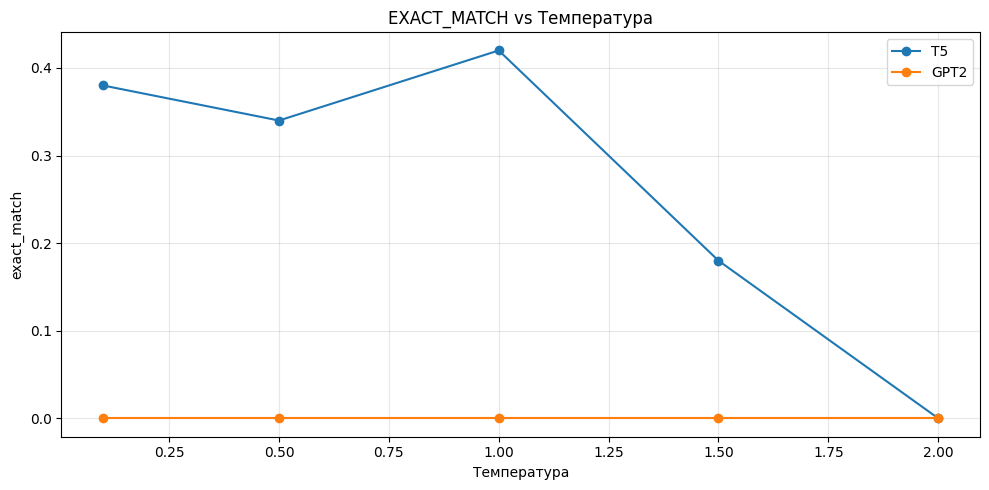

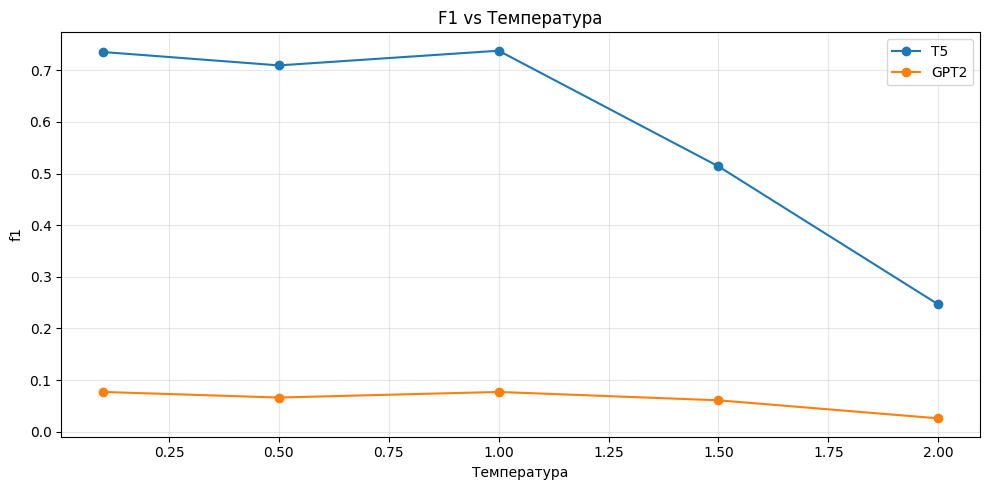

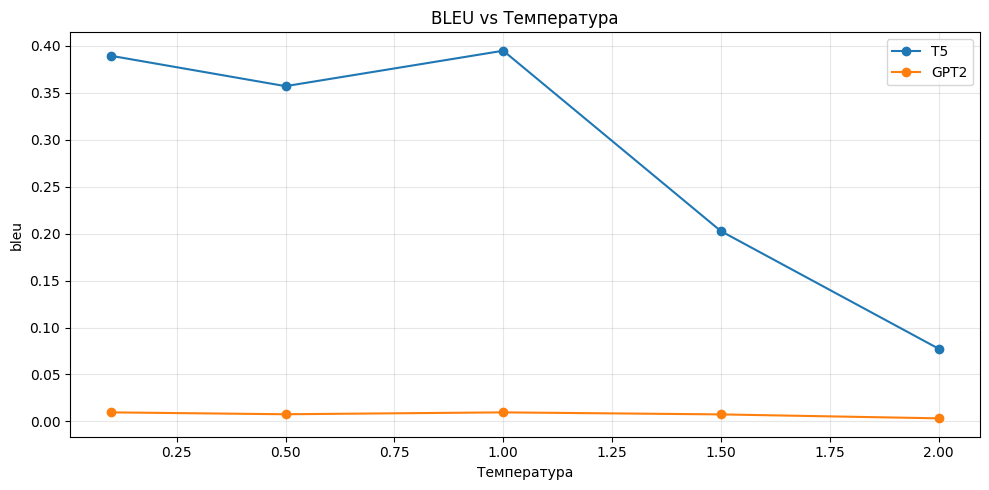

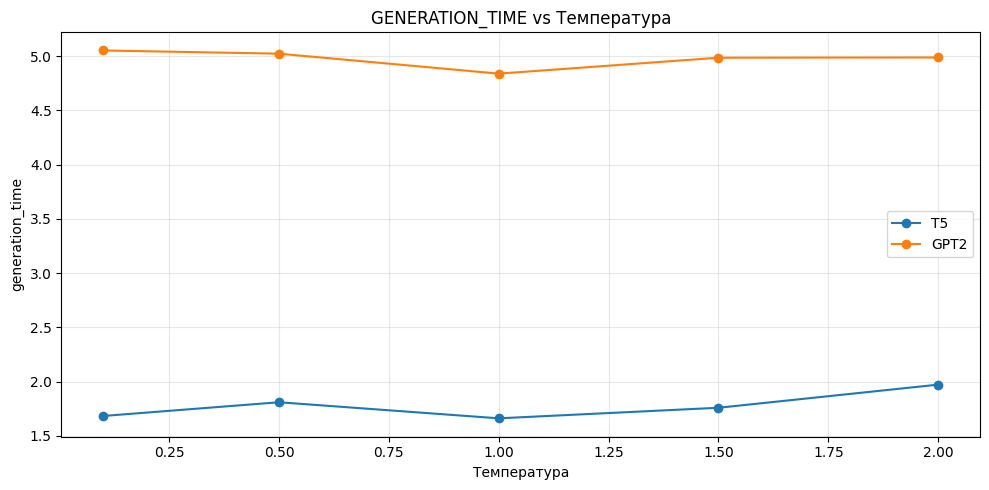

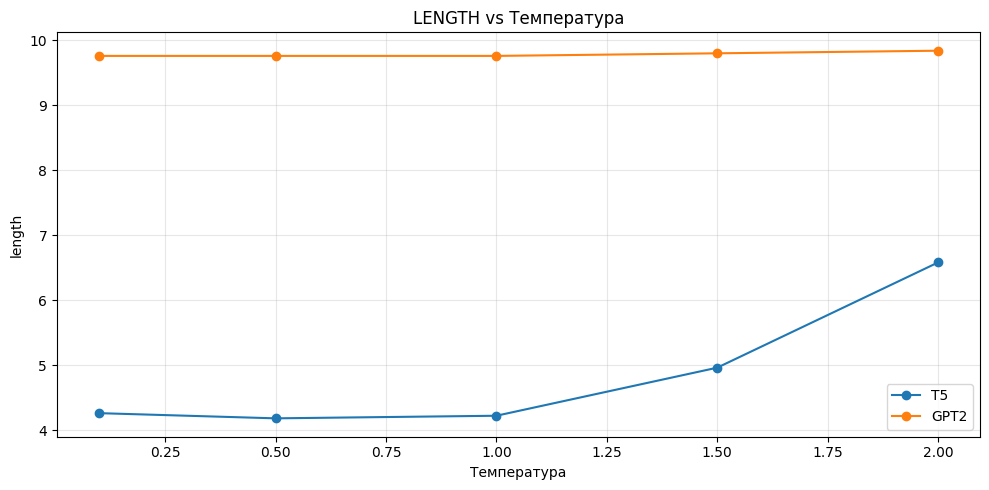

In [57]:
if test_data:
    all_results = {}

    # === T5 ===
    print("🚀 Тестирование T5")
    t5_results = experiment_temperature("cointegrated/rut5-base-multitask", "T5", test_data)
    all_results["T5"] = t5_results

    # === GPT2 ===
    print("🚀 Тестирование GPT2")
    gpt2_results = experiment_temperature("sberbank-ai/rugpt3small_based_on_gpt2", "GPT2", test_data)
    all_results["GPT2"] = gpt2_results

    # === QA ===
    print("🚀 Тестирование QA")
    qa_results = test_qa_model("Den4ikAI/rubert_large_squad_2", test_data)
    qa_metrics = evaluate_metrics(qa_results)
    qa_avg = print_average_metrics(qa_metrics, "QA: ")
    all_results["QA"] = {"default": qa_avg}

    # === Визуализация ===
    visualize_all_temperature_results(all_results)



In [64]:
print("Анализ типичных ошибок для всех моделей\n")

# Список моделей для анализа
models_to_test = [
    ("cointegrated/rut5-base-multitask", "T5", "T5"),
    ("sberbank-ai/rugpt3small_based_on_gpt2", "GPT2", "GPT2"),
    ("Den4ikAI/rubert_large_squad_2", "QA", "QA")
]

for model_name, model_type, display_name in models_to_test:
    try:
        print(f"🟢ВНИМАНИЕ! Модель: {display_name} ({model_name})")
        if model_type == "T5":
            examples = test_t5_model_with_params(model_name, test_data, temperature=0.5)
        elif model_type == "GPT2":
            examples = test_gpt2_model_with_params(model_name, test_data, temperature=0.5)
        elif model_type == "QA":
            examples = test_qa_model(model_name, test_data)
        else:
            examples = []

        errors = analyze_errors(examples)
        if errors:
            for err in errors[:3]:
                print(f"  Вопрос: {err['question']}")
                print(f"    Ответ: {err['prediction']}")
                print(f"    Эталон: {err['reference']}\n")
        else:
            print("  Нет ошибок (все ответы совпали с эталоном)\n")
    except Exception as e:
        print(f" Ошибка при тестировании модели: {e}\n")

Анализ типичных ошибок для всех моделей

🟢ВНИМАНИЕ! Модель: T5 (cointegrated/rut5-base-multitask)
  Вопрос: Как называется воздушное судно, выполняющее полет без пилота на борту?
    Ответ: Беспилотное воздушное судно
    Эталон: Беспилотное

  Вопрос: Синтезом каких культур являлась богемская культура ?
    Ответ: немецкой, чешской и еврейской культур
    Эталон: Немецкой, чешской и еврейской культур

  Вопрос: Как меняется кожа у змей?
    Ответ: шелушением или линькой.
    Эталон: У змей кожа меняется одномоментно.

🟢ВНИМАНИЕ! Модель: GPT2 (sberbank-ai/rugpt3small_based_on_gpt2)
  Вопрос: Как называется воздушное судно, выполняющее полет без пилота на борту?
    Ответ: Аэрокосмический термин «беспилотный летательный аппарат»
    Эталон: Беспилотное

  Вопрос: Синтезом каких культур являлась богемская культура ?
    Ответ: то была одна из самых древних культур в мире.

Какие
    Эталон: Немецкой, чешской и еврейской культур

  Вопрос: Как меняется кожа у змей?
    Ответ: Кожа на змеи

- Зачем нужен промпт?
Промпт (prompt) — это текстовый запрос, который вы передаёте модели, чтобы получить ответ. Он необходим, чтобы:

Дать модели контекст и задачу.
Указать, какого рода ответ вы ожидаете.
Направить модель на нужный тип генерации.

Форматы промптов в вашем коде
В вашем коде используются три разных формата промптов для A/B тестирования. Они нужны для того, чтобы понять, как модель реагирует на разные способы подачи информации.
- Почему разные форматы?

- Порядок информации: Вопрос-контекст или контекст-вопрос.
- Явное указание задачи: Некоторые форматы более явно указывают, что нужно сделать.
- Естественность: Некоторые форматы более приближены к естественному языку.



- Форматы промптов для A/B тестирования
- Формат 1:
Структура: "question: {question} context: {context}"

Сначала указывается вопрос, затем контекст.

Пример:
question: Какой цвет неба? context: Небо обычно голубого цвета из-за рассеяния света в атмосфере.

- Формат 2:
- Структура: "context: {context} question: {question}"

Сначала указывается контекст, затем вопрос.

Пример:
context: Небо обычно голубого цвета из-за рассеяния света в атмосфере. question: Какой цвет неба?

- Формат 3:
- Структура: "{context} Вопрос: {question} Ответ:"

Сначала полный контекст, затем вопрос в более естественной форме и слово "Ответ:" для указания модели, что дальше будет ответ.

Пример:
Небо обычно голубого цвета из-за рассеяния света в атмосфере. Вопрос: Какой цвет неба? Ответ:

- Зачем нужны разные форматы промптов?
Оценка влияния порядка информации:
Форматы 1 и 2 позволяют понять, влияет ли последовательность подачи вопроса и контекста на качество ответов.

- Естественность формулировки:
Формат 3 приближен к естественному языку и может помочь модели лучше понять задачу.

- Явное указание на ожидаемый ответ:
Формат 3 с "Ответ:" явно показывает, что далее следует сгенерированный ответ, что помогает модели сфокусироваться.

- Такое разнообразие форматов позволяет через A/B тестирование определить оптимальный способ подачи информации для повышения качества ответов модели.


Спасибо за внимание!